# Import Packages

In [2]:
#import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.anova import anova_lm

# Lecture

In [3]:
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\DSDP\\"

GraduateEarnings = pd.read_excel(str(filepath)+"GraduateEarnings.xlsx")

In [4]:
#Multivariate regression
Linear_Regression = smf.ols('Earn ~ Price + SAT + Public', data = GraduateEarnings).fit()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

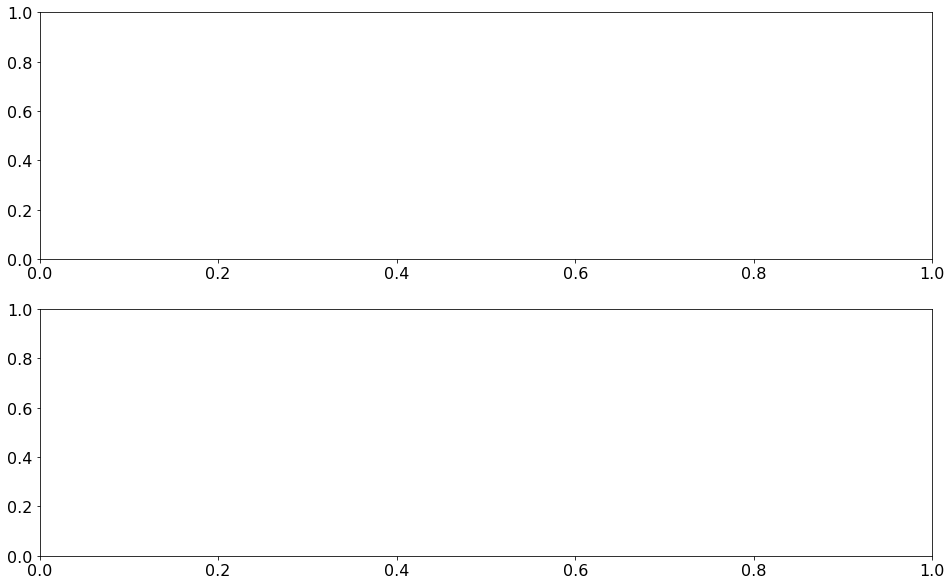

<Figure size 432x288 with 0 Axes>

In [6]:
# Create Residuals

residuals = Linear_Regression.resid
fitted = Linear_Regression.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

fig, ax =plt.subplots(2,1,figsize=(16,10))
plt.rcParams.update({'font.size': 16})

###########
"""
Residuals vs Fitted Plot is used to ...
"""
###########



# Rediduals vs Fitted Plot
##Create the plot

#plt.rcParams["figure.figsize"] = (8,7)

#fig, ax = plt.subplots(0,0)
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3,ax=ax[0,0])
## Annotate the max and min values
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))
    
###########
"""
Normal Q-Q plot is used to ...
"""
###########
# Normal Q-Q plot
sorted_student_residuals = pd.Series(Linear_Regression.get_influence().resid_studentized_internal)
sorted_student_residuals.index = Linear_Regression.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

#fig, ax = plt.subplots(1,0)
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none',ax=ax[0,1])
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()


###########
"""
Scale - Location Plot is used to ...
"""
###########

# Scale - Location Plot
student_residuals = EarnCostModel.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = EarnCostModel.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)
#fig, ax = plt.subplots(1,1)
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none',ax=ax[1,0])
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()


###########
"""
Residuals vs. Leverage Plot is used to ...
"""
###########

#Residuals vs. Leverage Plot
student_residuals = pd.Series(EarnCostModel.get_influence().resid_studentized_internal)
student_residuals.index = EarnCostModel.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = EarnCostModel.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

#fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none',ax=ax[1,1])
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))
    
    
###########
"""
Cooks Distance Plot is used to ...
"""
###########

# Cooks D??
cooksx = np.linspace(min(x), xpos, 50)
p = len(EarnCostModel.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r',ax=ax[2,0])
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()


In [7]:
GraduateEarn = GraduateEarnings

### Dataset Dimensions

In [ ]:

#Look at the dataset dimensions
GraduateEarn.shape

#Check the variable types
GraduateEarn.info()

#Summary Statistics for dataset
SummaryResults = GraduateEarn.describe(include='all')

### Simple Ordinary Least Squares

In [48]:
from statsmodels.formula.api import ols
#from statsmodels.formula.api import add_constant
#Simple linear regression (1 DV, 1 IV - both continuous)
#X will be our  independent variable(s)
X = GraduateEarn["Price"]
#Y will be our dependent variable
Y = GraduateEarn["Earn"]
#we need to add an intercept on our model
X = sm.add_constant(X)
#create our linear model
EarnCostModel = ols('Y ~ X', data=GraduateEarn).fit()
EarnCostModel.summary()

C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     63.17
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           7.55e-15
Time:                        11:21:52   Log-Likelihood:                -7193.2
No. Observations:                 706   AIC:                         1.439e+04
Df Residuals:                     704   BIC:                         1.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.021e+04    347.554     58.150      0.000    1.95e+04    2.09e+04
X[0]        2.021e+04    347.554     58.150      0.000    1.95e+04    2.09e+04
X[1]           0.1227      0.015      7.948      0.000       0.092       0.153
==============================================================================
Omnibus:                      114.947   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.069
Skew:                           0.977   Prob(JB):                     1.09e-45
Kurtosis:                       4.794   Cond. No.                     7.15e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

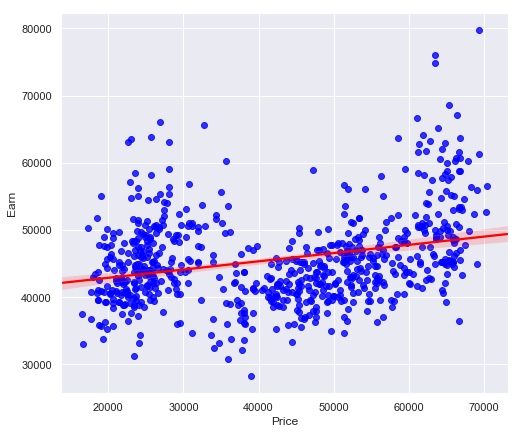

In [49]:
#Plot the regression model
sns.set(color_codes=True)
ax = sns.regplot(x="Price", y = "Earn", data  = GraduateEarn,
                     scatter_kws = {"color": "blue"},
                     line_kws = {"color": "red"})

In [50]:
#Calculate Predicted Values on current dataset
GraduateEarn['Y_EarnCostModel'] = EarnCostModel.predict(X)

In [52]:
#Assessing prediction accuracy
#Create Training and Test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state = 123)
#Build the model on training data
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred = lr.predict(X_train)
#Predict earnings on test data using model from training data
Y_test_pred = lr.predict(X_test)

In [53]:
#compare RMSE between train and test datasets
print("RMSE training data = ", np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print("RMSE testing data = ", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

RMSE training data =  6468.666972236126
RMSE testing data =  6311.0784874789315


Correlation
0.23242531118921067


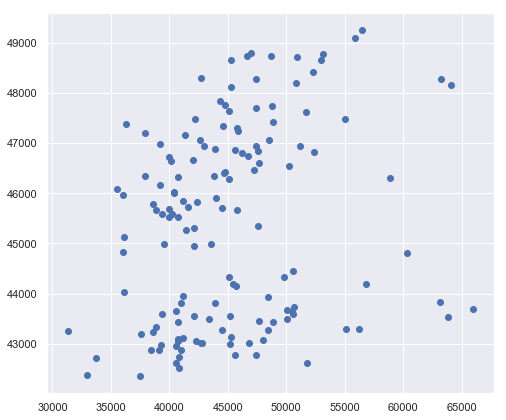

In [54]:
#look at correlation between actual and predicited in test data
from scipy.stats import pearsonr
stat, p = pearsonr(Y_test, Y_test_pred)
print('Correlation')
print(stat)
plt.scatter(x=Y_test , y=Y_test_pred)

In [55]:
#Diagnostics for our simple linear regression (Full Model)
EarnCostModel = ols('Y ~ X', data=GraduateEarn).fit() 
EarnCostModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     63.17
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           7.55e-15
Time:                        11:22:16   Log-Likelihood:                -7193.2
No. Observations:                 706   AIC:                         1.439e+04
Df Residuals:                     704   BIC:                         1.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.021e+04    347.554     58.150      0.000    1.95e+04    2.09e+04
X[0]        2.021e+04    347.554     58.150      0.000    1.95e+04    2.09e+04
X[1]           0.1227      0.015      7.948      0.000       0.092       0.153
==============================================================================
Omnibus:                      114.947   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.069
Skew:                           0.977   Prob(JB):                     1.09e-45
Kurtosis:                       4.794   Cond. No.                     7.15e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Diagnostic Plots

#### Residuals vs Fitted

In [8]:
#Residuals vs Fitted Plot
residuals = Linear_Regression.resid
fitted = Linear_Regression.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

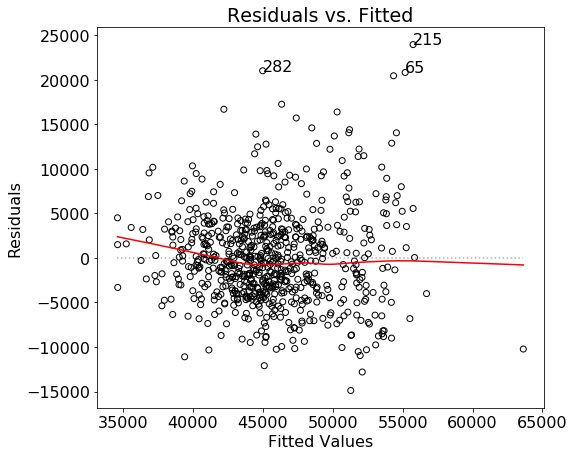

In [22]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

#Annotate the max and min values
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

#### Q-Q Plot

In [60]:
#Normal Q-Q plot
sorted_student_residuals = pd.Series(EarnCostModel.get_influence().resid_studentized_internal)
sorted_student_residuals.index = EarnCostModel.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

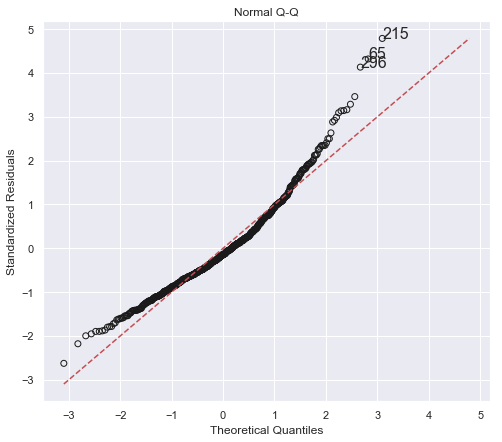

In [61]:
fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()


#### Studentized Residuals Plot

In [62]:
#Scale - Location Plot
student_residuals = EarnCostModel.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = EarnCostModel.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]


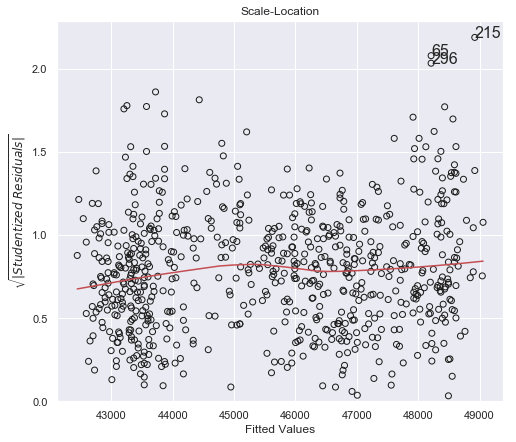

In [63]:
fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

#### Residuals vs Leverage

In [27]:
#Residuals vs. Leverage
student_residuals = pd.Series(Linear_Regression.get_influence().resid_studentized_internal)
student_residuals.index = Linear_Regression.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = Linear_Regression.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]


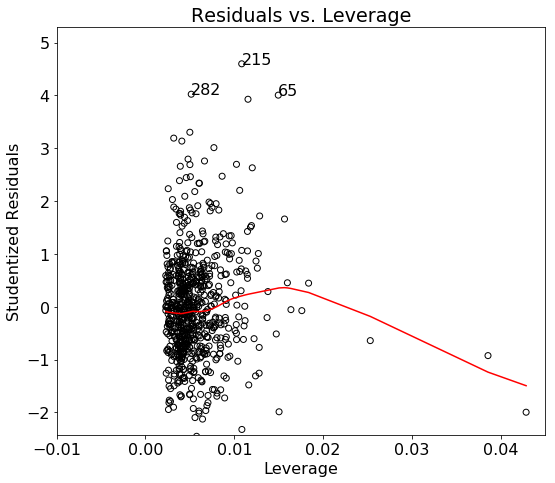

In [28]:
fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

#### Cooks D

In [37]:
len(cooksx)
x.count()

706

In [30]:
cooksx = np.linspace(min(x), xpos, 50)
p = len(Linear_Regression.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)


ValueError: x and y must be the same size

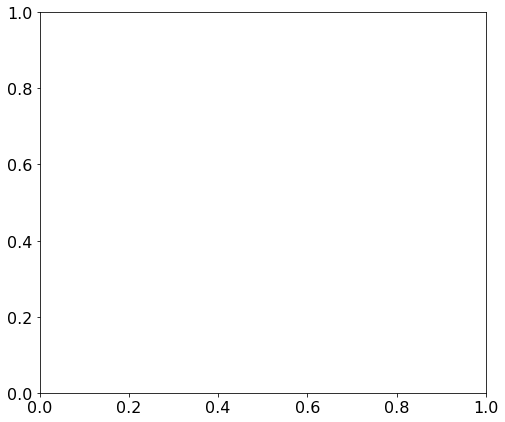

In [33]:
fig, ax = plt.subplots()
plt.scatter(cooksx,x,edgecolors = 'k', facecolors = 'none')
ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

### Assumptions

#### Linearity

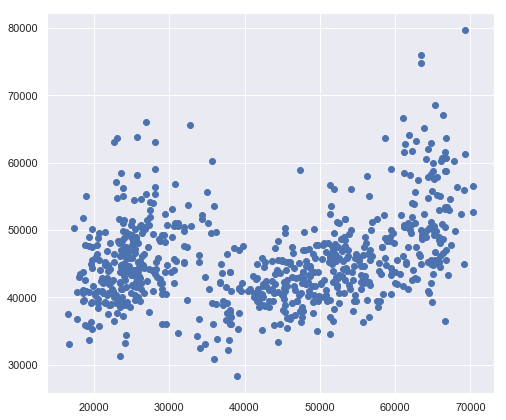

In [68]:
#Statistical Assumptions
#Linearity (DV and IV)
plt.scatter(x=GraduateEarn['Price'] , y=GraduateEarn['Earn'])

#### Normality

In [69]:
#Normality
#For the IV
stat, p = shapiro(GraduateEarn['Price'])
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

Shapiro Statistic=0.925, p=0.000


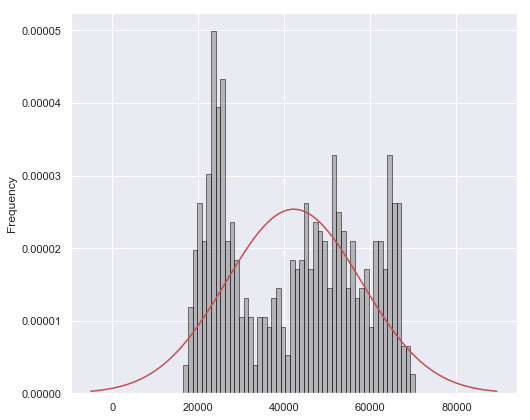

In [70]:
GraduateEarn['Price'].plot.hist(alpha=0.5, bins=50, grid=True, 
            legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = GraduateEarn['Price'].mean()
variance = GraduateEarn['Price'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()


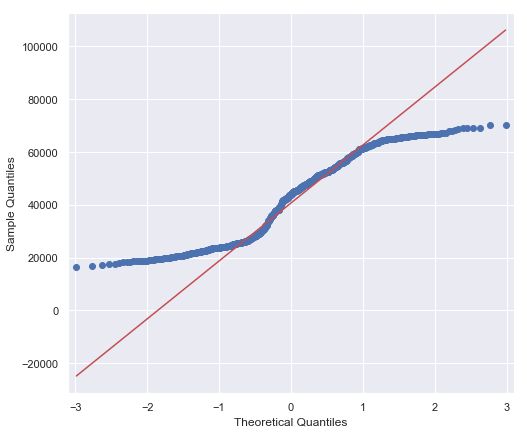

In [71]:
qqplot(GraduateEarn['Price'], line='q')
plt.show()

In [72]:
#For the Residuals
stat, p = shapiro(residuals)
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

Shapiro Statistic=0.953, p=0.000


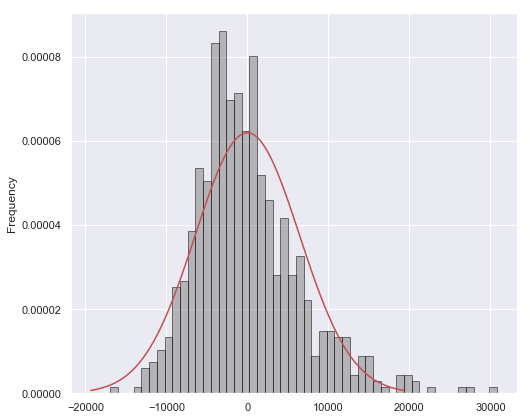

In [73]:
residuals.plot.hist(alpha=0.5, bins=50, grid=True, 
                    legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = residuals.mean()
variance = residuals.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

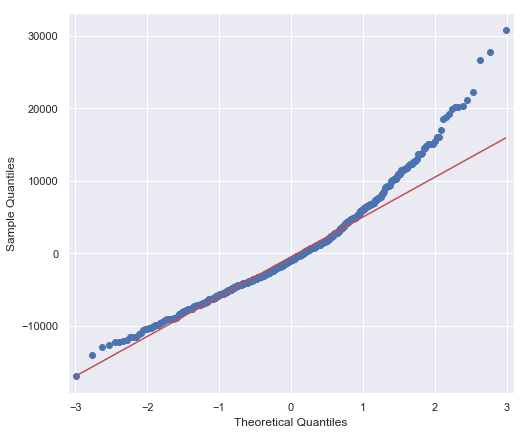

In [74]:
qqplot(residuals, line='q')
plt.show()

#### Multicollinearity

In [75]:
#Multicollinearity
#Grab the numerical data for the correlation matrix
df_sub = pd.DataFrame(GraduateEarn, columns=['Earn', 'Price', 'SAT', 'ACT'])
corrmatrix = df_sub.corr()
print(corrmatrix)

           Earn     Price       SAT       ACT
Earn   1.000000  0.286945  0.553771  0.550898
Price  0.286945  1.000000  0.498560  0.541724
SAT    0.553771  0.498560  1.000000  0.936266
ACT    0.550898  0.541724  0.936266  1.000000


### Other Metrics

#### Variance Inflation Factor

In [76]:
# Calculate VIF for IVs
y, X = dmatrices(formula_like="Earn ~ Price + SAT + ACT ", data=GraduateEarn, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Price VIF =', vif[1])
print('SAT VIF =', vif[2])
print('ACT VIF =', vif[3])

Price VIF = 1.4165696782611905
SAT VIF = 8.110279997133745
ACT VIF = 8.625713637200827


#### Autocorrelation: Durbin-Watson

In [77]:
#Autocorrelation
print('Durbin-Watson =', durbin_watson(residuals))

Durbin-Watson = 1.8161507938624044


### Multiple Ordinary Least Squares

In [78]:
#Multivariate regression
MultReg = smf.ols('Earn ~ Price + SAT + Public', data = GraduateEarn).fit()
MultReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Earn   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.19e-76
Time:                        11:23:06   Log-Likelihood:                -7045.7
No. Observations:                 706   AIC:                         1.410e+04
Df Residuals:                     702   BIC:                         1.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e+04   1742.734      6.024      0.000    7075.906    1.39e+04
Price          0.2981      0.032      9.268      0.000       0.235       0.361
SAT           16.6125      1.950      8.518      0.000      12.783      20.441
Public      9355.2181    920.576     10.162      0.000    7547.806    1.12e+04
==============================================================================
Omnibus:                       80.685   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.548
Skew:                           0.734   Prob(JB):                     4.98e-31
Kurtosis:                       4.610   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Comparison Techniques

#### ANOVA Model Comparison

In [79]:
#Model Selection
#Comparison with ANOVA
BaseModel = smf.ols('Earn ~ Price + SAT + Public', data = GraduateEarn).fit()
Model1 = smf.ols('Earn ~ Price + SAT', data = GraduateEarn).fit()
Model2 = smf.ols('Earn ~ Price', data = GraduateEarn).fit()
AnovaResults_M1_M2 = anova_lm(Model2, Model1)
print(AnovaResults_M1_M2)
AnovaResults_M1_BM = anova_lm(BaseModel, Model1)
print(AnovaResults_M1_BM)

   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0     704.0  2.924952e+10      0.0           NaN         NaN           NaN
1     703.0  2.209439e+10      1.0  7.155131e+09  227.662141  9.048339e-45
   df_resid           ssr  df_diff       ss_diff          F  Pr(>F)
0     702.0  1.926087e+10      0.0           NaN        NaN     NaN
1     703.0  2.209439e+10     -1.0 -2.833526e+09  90.157211     NaN


C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Stepwise

In [80]:
DataSubset = pd.DataFrame(GraduateEarn, columns=['Earn', 'Price', 'SAT', 'Public'])

#### Forward Selection

In [81]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [83]:
model = forward_selected(GraduateEarn, 'Earn')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))


Model Selected
Earn ~ ACT + need_fraction + Location + 1
R2= 0.39147905145300177


# Homework

In [3]:
filepath = "C:\\Users\\hlmq\\OneDrive - Chevron\\Data\\DSDP\\"

Facebook = pd.read_excel(str(filepath)+"Facebook_Post_Prediction_Truncated.xlsx")

In [4]:
df = Facebook

In [5]:
df.head()

,PagePopularity,PageCheckin,PageTalkingAbout,PageCategory,CommentCount24,PostLength,PostShareCount,PostPromotionStatus,TimeLikesMeasured,PostSunday,PostMonday,PostTuesday,PostWednesday,PostThursday,PostFriday,PostSaturday,NumberLikes24
0,634995,0,463,1,2,84,2,0,24,0,0,0,0,1,0,0,1
1,634995,0,463,1,2,89,1,0,24,0,0,0,0,1,0,0,0
2,634995,0,463,1,13,118,2,0,24,0,0,0,0,0,0,1,0
3,4394623,0,151766,2,1484,98,1815,0,24,0,0,0,0,1,0,0,292
4,3566966,0,38251,3,0,138,1,0,24,0,0,0,0,0,1,0,0


In [6]:
#df.describe, sns.distplot

In [7]:
X_columns = ['CommentCount24','PostLength','PostShareCount','PostSaturday']
Y_column = ['NumberLikes24']

### Model

In [16]:
LinearModel = smf.ols('NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday', data = df ).fit()
LinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberLikes24   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.19e-151
Time:                        15:37:31   Log-Likelihood:                -21348.
No. Observations:                3576   AIC:                         4.271e+04
Df Residuals:                    3571   BIC:                         4.274e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8240      2.049      4.307      0.000       4.807      12.841
CommentCount24     0.1621      0.007     24.380      0.000       0.149       0.175
PostLength        -0.0006      0.005     -0.138      0.890      -0.010       0.008
PostShareCount     0.0095      0.002      5.772      0.000       0.006       0.013
PostSaturday      15.1148      3.764      4.016      0.000       7.735      22.494
==============================================================================
Omnibus:                     5797.664   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4919157.799
Skew:                          10.446   Prob(JB):                         0.00
Kurtosis:                     183.494   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Diagnostic Plots

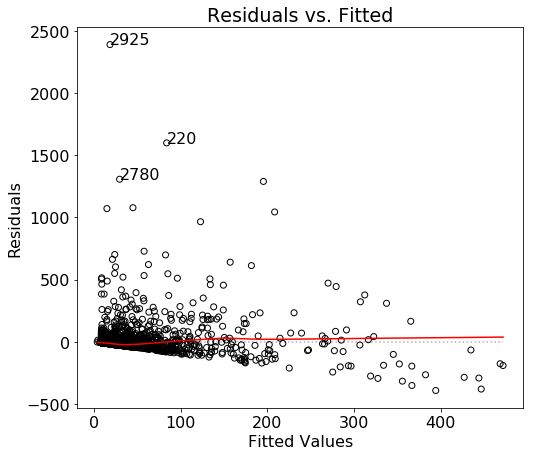

In [17]:
#Residuals vs Fitted Plot
residuals = LinearModel.resid
fitted = LinearModel.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

#Annotate the max and min values
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

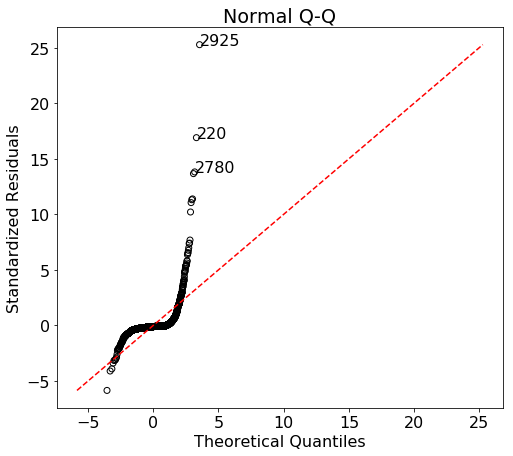

In [9]:
#Normal Q-Q plot
sorted_student_residuals = pd.Series(LinearModel.get_influence().resid_studentized_internal)
sorted_student_residuals.index = LinearModel.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

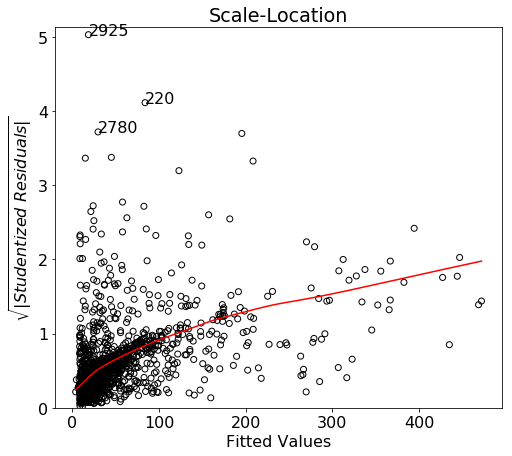

In [10]:
#Scale - Location Plot
student_residuals = LinearModel.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = LinearModel.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

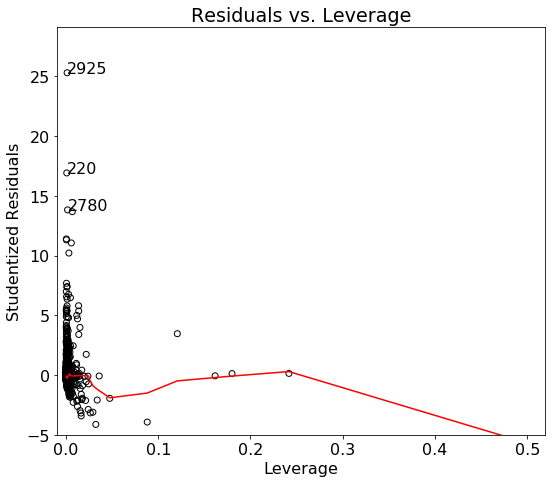

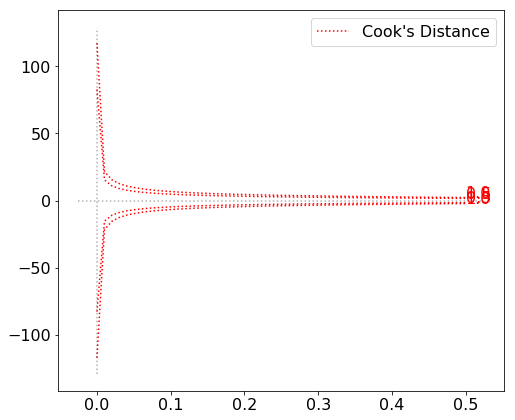

In [31]:
#Residuals vs. Leverage
student_residuals = pd.Series(LinearModel.get_influence().resid_studentized_internal)
student_residuals.index = LinearModel.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = LinearModel.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))
    
    
# Cooks D
cooksx = np.linspace(min(x), xpos, 50)
p = len(LinearModel.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

fig, ax = plt.subplots()
ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\hlmq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


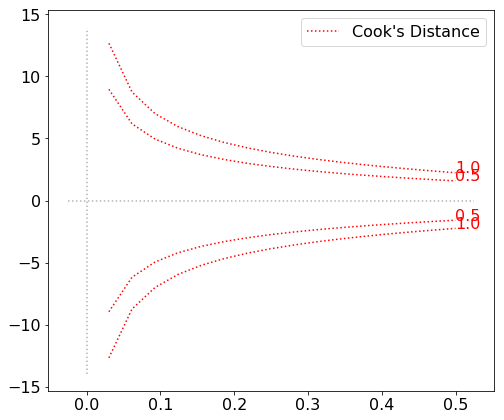

In [30]:
# Cooks D
cooksx = np.linspace(min(x), xpos, 50)
p = len(LinearModel.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

fig, ax = plt.subplots()
ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

### Assumptions

In [29]:
df = Facebook

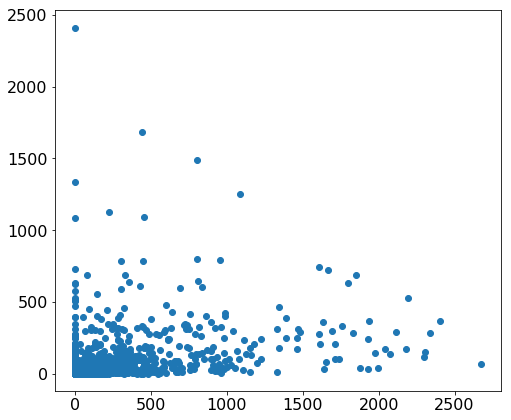

In [17]:
#Linearity (DV and IVs)
plt.scatter(x=df['CommentCount24'] , y=df['NumberLikes24'])

In [8]:
#Normality
#For the IVs
for i in X_columns:
    stat, p = shapiro(df[i])
    print('Column name: ' + i)
    print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

Column name: CommentCount24
Shapiro Statistic=0.419, p=0.000
Column name: PostLength
Shapiro Statistic=0.252, p=0.000
Column name: PostShareCount
Shapiro Statistic=0.144, p=0.000
Column name: PostSaturday
Shapiro Statistic=0.521, p=0.000


In [9]:
X_columns

['CommentCount24', 'PostLength', 'PostShareCount', 'PostSaturday']

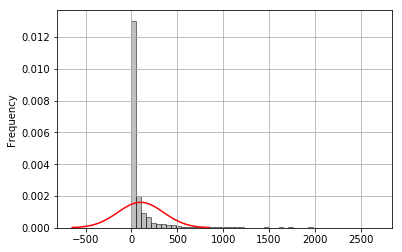

In [12]:
# Histogram for a Variable
X_var = ['CommentCount24']

df[X_var].plot.hist(alpha=0.5, bins=50, grid=True, 
            legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = df[X_var].mean()
variance = df[X_var].var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

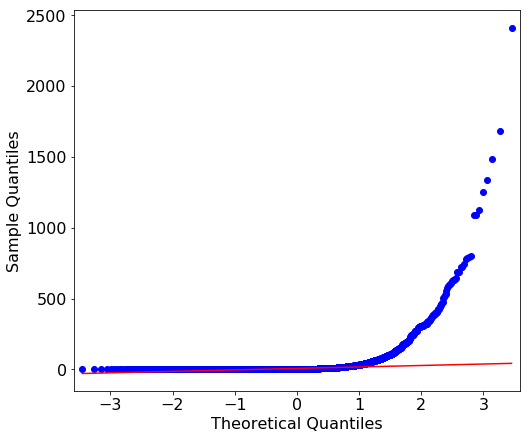

In [20]:
#Q-Q Plot
qqplot(df['NumberLikes24'], line='q')
plt.show()

In [21]:
#Multicollinearity
#Grab the numerical data for the correlation matrix
assumptions_sub = pd.DataFrame(df, columns=X_columns)
corrmatrix = assumptions_sub.corr()
print(corrmatrix)

                CommentCount24  PostLength  PostShareCount  PostSaturday
CommentCount24        1.000000   -0.025914        0.285577     -0.030060
PostLength           -0.025914    1.000000       -0.014609     -0.000795
PostShareCount        0.285577   -0.014609        1.000000     -0.015269
PostSaturday         -0.030060   -0.000795       -0.015269      1.000000


In [14]:
# Calculate VIF for IVs
y, X = dmatrices(formula_like="NumberLikes24 ~ CommentCount24 + PostLength + PostShareCount + PostSaturday", data=df, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

a=0

for i in X_columns:
    stat, p = shapiro(df[i])
    a +=1
    print('Column name: ' + i)
    print(vif[a])

Column name: CommentCount24
1.0901423954112348
Column name: PostLength
1.0007312731611562
Column name: PostShareCount
1.0889105958345877
Column name: PostSaturday
1.0009558282355517


In [1]:
#Autocorrelation
print('Durbin-Watson =', durbin_watson(residuals))

NameError: name 'durbin_watson' is not defined

### Model Selection

In [43]:
df = Facebook

#### Data Step

In [22]:
#Stepwise Regression
DataSubset = pd.DataFrame(df, columns=Y_column+X_columns)

#### Forward Selection

In [23]:
def forward_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [25]:
model = forward_selection(DataSubset,'NumberLikes24')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

Model Selected
NumberLikes24 ~ CommentCount24 + PostShareCount + PostSaturday + 1
R2= 0.17882519477504233


In [24]:
DataSubset.head()

,NumberLikes24,CommentCount24,PostLength,PostShareCount,PostSaturday
0,1,2,84,2,0
1,0,2,89,1,0
2,0,13,118,2,1
3,292,1484,98,1815,0
4,0,0,138,1,0
